In [5]:
#importing libraries 
import numpy as np 
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [6]:
#loading the dataset
data = pd.read_csv('/content/drive/MyDrive/TMLC/WildBlueberryPollinationSimulationData.csv')

In [7]:
# Preview the first 5 lines of the loaded data 
data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [8]:
data.shape

(777, 18)

In [9]:
data.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [10]:

data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [11]:
# using isnull() function  
data.isnull()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
775,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


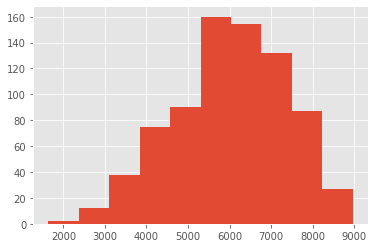

In [12]:
plt.hist(data['yield'])
plt.show()

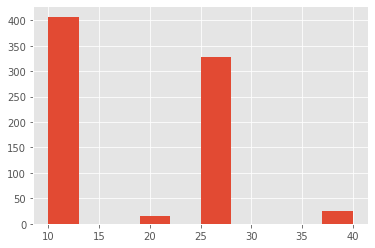

In [13]:
plt.hist(data['clonesize'])
plt.show()

In [14]:
#removing outlier from clonesize column

from scipy import stats
data[(np.abs(stats.zscore(data['clonesize'])) < 3)]

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,771,20.0,0.000,0.058,0.409,0.117,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.335927,0.377012,28.135899,3471.192143
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


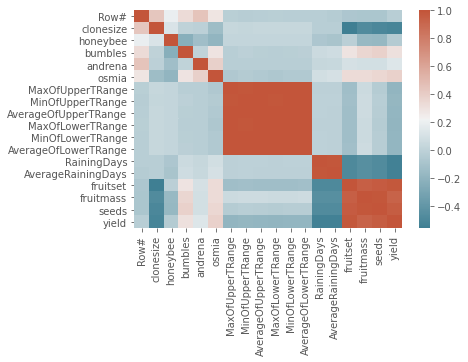

In [15]:
# calculate correlation matrix
corr = data.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,  cmap=sns.diverging_palette(220, 20, as_cmap=True))

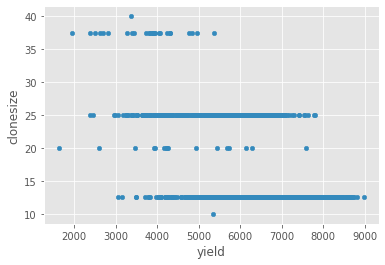

In [16]:
data.plot(kind='scatter', x='yield', y='clonesize')

In [17]:
# define model
model = Lasso(alpha=1.0)

In [18]:
# split data into features and target 
X = data.drop(['yield'], axis = 1)
y = data['yield'].values

In [19]:
from numpy import mean
from numpy import std
from numpy import absolute
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 120.165 (12.592)


In [20]:

# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [21]:
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -96.289
Config: {'alpha': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5906501.125369847, tolerance: 142887.03229357404
  positive)


In [22]:
## Load requried packages
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [23]:

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30,
random_state=40)
print(Xtrain.shape)
print(Xtest.shape)

(543, 17)
(234, 17)


In [24]:
## Build the lasso model with alpha

model_lasso = Lasso(alpha=1,normalize=True)
model_lasso.fit(Xtrain, ytrain)
pred_train_lasso= model_lasso.predict(Xtrain)
pred_test_lasso= model_lasso.predict(Xtest)

In [25]:
## Evaluate the lasso model
print(np.sqrt(mean_squared_error(ytrain,pred_train_lasso)))
print(r2_score(ytrain, pred_train_lasso))
print(np.sqrt(mean_squared_error(ytest,pred_test_lasso)))
print(r2_score(ytest, pred_test_lasso))

150.1037959665296
0.9876190621366695
158.03171236275946
0.9867293149795683


In [26]:
## Tunning lasso regression model

from numpy import arange
from sklearn.model_selection import RepeatedKFold
import pandas as pd
from sklearn.linear_model import LassoCV


#load the dataset 
# split data into features and target 
X = data.drop(['yield'], axis = 1)
y = data['yield'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30,
random_state=40)

## define model evaluation method
cross_validation = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

## define model

lasso_model = LassoCV(alphas=arange(0, 1, 0.02), normalize= True, cv=cross_validation , n_jobs=-1)

## fit model
lasso_model .fit(Xtrain, ytrain)
## summarize chosen configuration
print('alpha: %f' % lasso_model .alpha_)

pred_train_lasso= lasso_model .predict(Xtrain)
pred_test_lasso= lasso_model .predict(Xtest)



print(np.sqrt(mean_squared_error(ytrain,pred_train_lasso)))
print(r2_score(ytrain, pred_train_lasso))
print(np.sqrt(mean_squared_error(ytest,pred_test_lasso)))
print(r2_score(ytest, pred_test_lasso))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3746191.056765318, tolerance: 91405.95737428861
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3316079.1119173765, tolerance: 90080.77892089954
  tol, rng, random, positive)
/usr/local/

alpha: 0.280000
133.17114307528516
0.9902548069100595
139.1294569851688
0.9897140826668444


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3662675.6503208876, tolerance: 87138.13686858091
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3653911.3254954815, tolerance: 88449.06298995399
  tol, rng, random, positive)


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
